In [1]:
# importing all necessary libraries

#basic libraries
import numpy as np
import pandas as pd
import csv
import matplotlib.pyplot as plt

#for dataset processing and encoding
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

# for training
from sklearn.linear_model import LogisticRegression

# for metric score
from sklearn.metrics import accuracy_score


import pickle

In [2]:
# Data preprocessing

file_path = r'main_dataset_fcd.txt'
df = pd.read_csv(file_path, sep='\t', names=['type','clue'], on_bad_lines='skip')
df = df[df['type'].isin(['normal', 'fraud'])]
df = df.sample(frac=1, random_state=42)

In [3]:
df['type'].value_counts()

type
normal    5441
fraud      848
Name: count, dtype: int64

Text(0, 0.5, 'count')

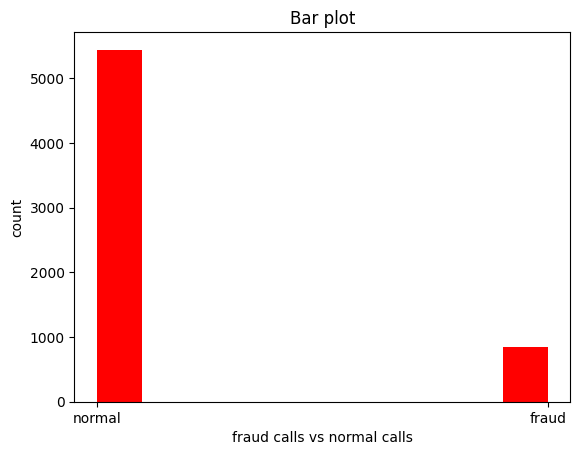

In [4]:
# Data Viewing

plt.hist(df['type'],color = 'r')
plt.title("Bar plot")
plt.xlabel("fraud calls vs normal calls")
plt.ylabel("count")

In [6]:
# Label Encoding
df['type'].replace(["fraud","normal"],[1,0],inplace=True)

# Using Vectorizer for better word encoding
vectorizer = TfidfVectorizer(max_features=1000)
X = vectorizer.fit_transform(df['clue'])
Y = df['type']

In [7]:
#analysing imp word

important_words = vectorizer.get_feature_names_out()
print(important_words)

['000' '03' '08000839402' '08000930705' '10' '100' '1000' '10p' '11' '12'
 '150' '150p' '150ppm' '16' '18' '1st' '200' '2000' '23' '250' '2nd' '30'
 '350' '50' '500' '5000' '750' '800' '8007' '86688' 'aadhar' 'able'
 'about' 'abt' 'access' 'account' 'action' 'activate' 'actually' 'address'
 'aft' 'after' 'afternoon' 'again' 'age' 'ago' 'ah' 'ahead' 'aight' 'all'
 'almost' 'alone' 'already' 'alright' 'also' 'always' 'am' 'amazing'
 'amount' 'amp' 'an' 'and' 'angry' 'another' 'answer' 'any' 'anyone'
 'anything' 'anytime' 'anyway' 'application' 'apply' 'ard' 'are' 'around'
 'as' 'ask' 'asked' 'asking' 'ass' 'at' 'atm' 'attempt' 'auction'
 'available' 'avoid' 'await' 'award' 'awarded' 'away' 'awesome' 'babe'
 'baby' 'back' 'bad' 'balance' 'bank' 'bath' 'be' 'beautiful' 'because'
 'become' 'bed' 'been' 'before' 'being' 'believe' 'best' 'better'
 'between' 'big' 'bill' 'birthday' 'bit' 'blue' 'bonus' 'book' 'books'
 'bored' 'both' 'bout' 'box' 'boy' 'boytoy' 'break' 'bring' 'brother'
 'bslvy

In [8]:
#Split the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.20, random_state=42)

In [9]:
# Training Model
model = LogisticRegression(C=10)
model.fit(X_train, Y_train)

#Evaluating the model
y_pred = model.predict(X_test)
accuracy = accuracy_score(Y_test, y_pred)
print("Accuracy:", accuracy*100, "%")

Accuracy: 99.04610492845786 %


In [10]:
# Saving Model
with open(r'trained_model.pkl', 'wb') as file:
    pickle.dump(model, file)

#Saving Vectorizer
with open(r'vectorizer.pkl', 'wb') as file:
    pickle.dump(vectorizer, file)

In [12]:
# Testing

with open(r'trained_model.pkl', 'rb') as file:
    model = pickle.load(file)

text="hello i am manager speaking, give me the bank details"

text_to_predict = vectorizer.transform([text])
prediction = model.predict(text_to_predict)
if prediction[0] == 1:
    print("Prediction: Fraudulent call")
else:
    print("Prediction: Normal call")

Prediction: Fraudulent call


In [72]:
# THE END OF THE MODEL TRAINING PART